# Dynamic Consequences of Fiscal Shocks in Two-Agents Keynesian Model with Evolving Debt and Distortionary Taxation


In [57]:
import econpizza as ep
from pathlib import Path
import matplotlib.pyplot as plt

## Model preparation

In [41]:
base = ep.parse("src/tank.yml")
base = ep.load(base)
m_base = base.solve_stst()

(load:) Parsing done.
    Iteration   1 | max. error 7.62e+00 | lapsed 1.0658
    Iteration   2 | max. error 1.30e+00 | lapsed 1.0658
    Iteration   3 | max. error 9.42e-01 | lapsed 1.0814
    Iteration   4 | max. error 1.13e-01 | lapsed 1.0824
    Iteration   5 | max. error 4.88e-02 | lapsed 1.0824
    Iteration   6 | max. error 1.79e-02 | lapsed 1.0824
    Iteration   7 | max. error 4.54e-03 | lapsed 1.0824
    Iteration   8 | max. error 4.67e-04 | lapsed 1.0824
    Iteration   9 | max. error 6.07e-06 | lapsed 1.0824
(solve_stst:) Steady state found (1.1319s). The solution converged.


In [42]:
debt = ep.parse("src/tank_debt.yml")
debt = ep.load(debt)
m_debt = debt.solve_stst()

(load:) Parsing done.
    Iteration   1 | max. error 7.62e+00 | lapsed 1.8814
    Iteration   2 | max. error 1.30e+00 | lapsed 1.8985
    Iteration   3 | max. error 9.42e-01 | lapsed 1.9016
    Iteration   4 | max. error 1.13e-01 | lapsed 1.9039
    Iteration   5 | max. error 4.88e-02 | lapsed 1.9039
    Iteration   6 | max. error 1.79e-02 | lapsed 1.9039
    Iteration   7 | max. error 4.54e-03 | lapsed 1.9039
    Iteration   8 | max. error 4.67e-04 | lapsed 1.9039
    Iteration   9 | max. error 6.07e-06 | lapsed 1.9039
(solve_stst:) Steady state found (2.014s). The solution converged.


In [43]:
tax = ep.parse("src/tank_labor.yml")
tax = ep.load(tax)
m_tax = tax.solve_stst()

(load:) Parsing done.
    Iteration   1 | max. error 7.86e+00 | lapsed 6.7829
    Iteration   2 | max. error 1.30e+00 | lapsed 6.7985
    Iteration   3 | max. error 9.42e-01 | lapsed 6.8142
    Iteration   4 | max. error 1.13e-01 | lapsed 6.8142
    Iteration   5 | max. error 4.88e-02 | lapsed 6.8142
    Iteration   6 | max. error 1.79e-02 | lapsed 6.8142
    Iteration   7 | max. error 4.54e-03 | lapsed 6.8142
    Iteration   8 | max. error 4.67e-04 | lapsed 6.8142
    Iteration   9 | max. error 6.07e-06 | lapsed 6.8142
(solve_stst:) Steady state found (6.9218s). The solution converged.


In [44]:
tax_debt = ep.parse("src/tank_labor_debt.yml")
tax_debt = ep.load(tax_debt)
m_tax_debt = tax_debt.solve_stst()

(load:) Parsing done.
    Iteration   1 | max. error 7.86e+00 | lapsed 2.0542
    Iteration   2 | max. error 1.30e+00 | lapsed 2.0542
    Iteration   3 | max. error 9.42e-01 | lapsed 2.0542
    Iteration   4 | max. error 1.13e-01 | lapsed 2.0542
    Iteration   5 | max. error 4.88e-02 | lapsed 2.0542
    Iteration   6 | max. error 1.79e-02 | lapsed 2.0542
    Iteration   7 | max. error 4.54e-03 | lapsed 2.0698
    Iteration   8 | max. error 4.67e-04 | lapsed 2.0698
    Iteration   9 | max. error 6.07e-06 | lapsed 2.0698
(solve_stst:) Steady state found (2.1353s). The solution converged.


## Introduction of shock to government spendings

In [45]:
shock = ("e_g", 0.1)

trj, flag = base.find_path(shock=shock)
trj_debt, flag_debt = debt.find_path(shock=shock)
trj_tax, flag_tax = tax.find_path(shock=shock)
trj_tax_debt, flag_tax_debt = tax_debt.find_path(shock=shock)



    Iteration   1 | max error 4.92e-01 | lapsed 2.5079s
    Iteration   2 | max error 1.02e-02 | lapsed 2.5667s
    Iteration   3 | max error 3.21e-06 | lapsed 2.5742s
    Iteration   4 | max error 4.03e-13 | lapsed 2.6075s
(find_path:) Stacking done (2.686s). The solution converged.
    Iteration   1 | max error 4.92e-01 | lapsed 1.9277s
    Iteration   2 | max error 1.02e-02 | lapsed 1.9590s
    Iteration   3 | max error 3.21e-06 | lapsed 1.9746s
    Iteration   4 | max error 4.21e-13 | lapsed 2.0058s
(find_path:) Stacking done (2.038s). The solution converged.
    Iteration   1 | max error 4.82e-01 | lapsed 2.5122s
    Iteration   2 | max error 9.93e-03 | lapsed 2.5336s
    Iteration   3 | max error 3.11e-06 | lapsed 2.5649s
    Iteration   4 | max error 4.20e-13 | lapsed 2.6097s
(find_path:) Stacking done (2.648s). The solution converged.
    Iteration   1 | max error 5.73e-01 | lapsed 2.3437s
    Iteration   2 | max error 1.25e-02 | lapsed 2.3913s
    Iteration   3 | max error 4.5

## IRFs by model specification

### Comparison of models without the labor tax

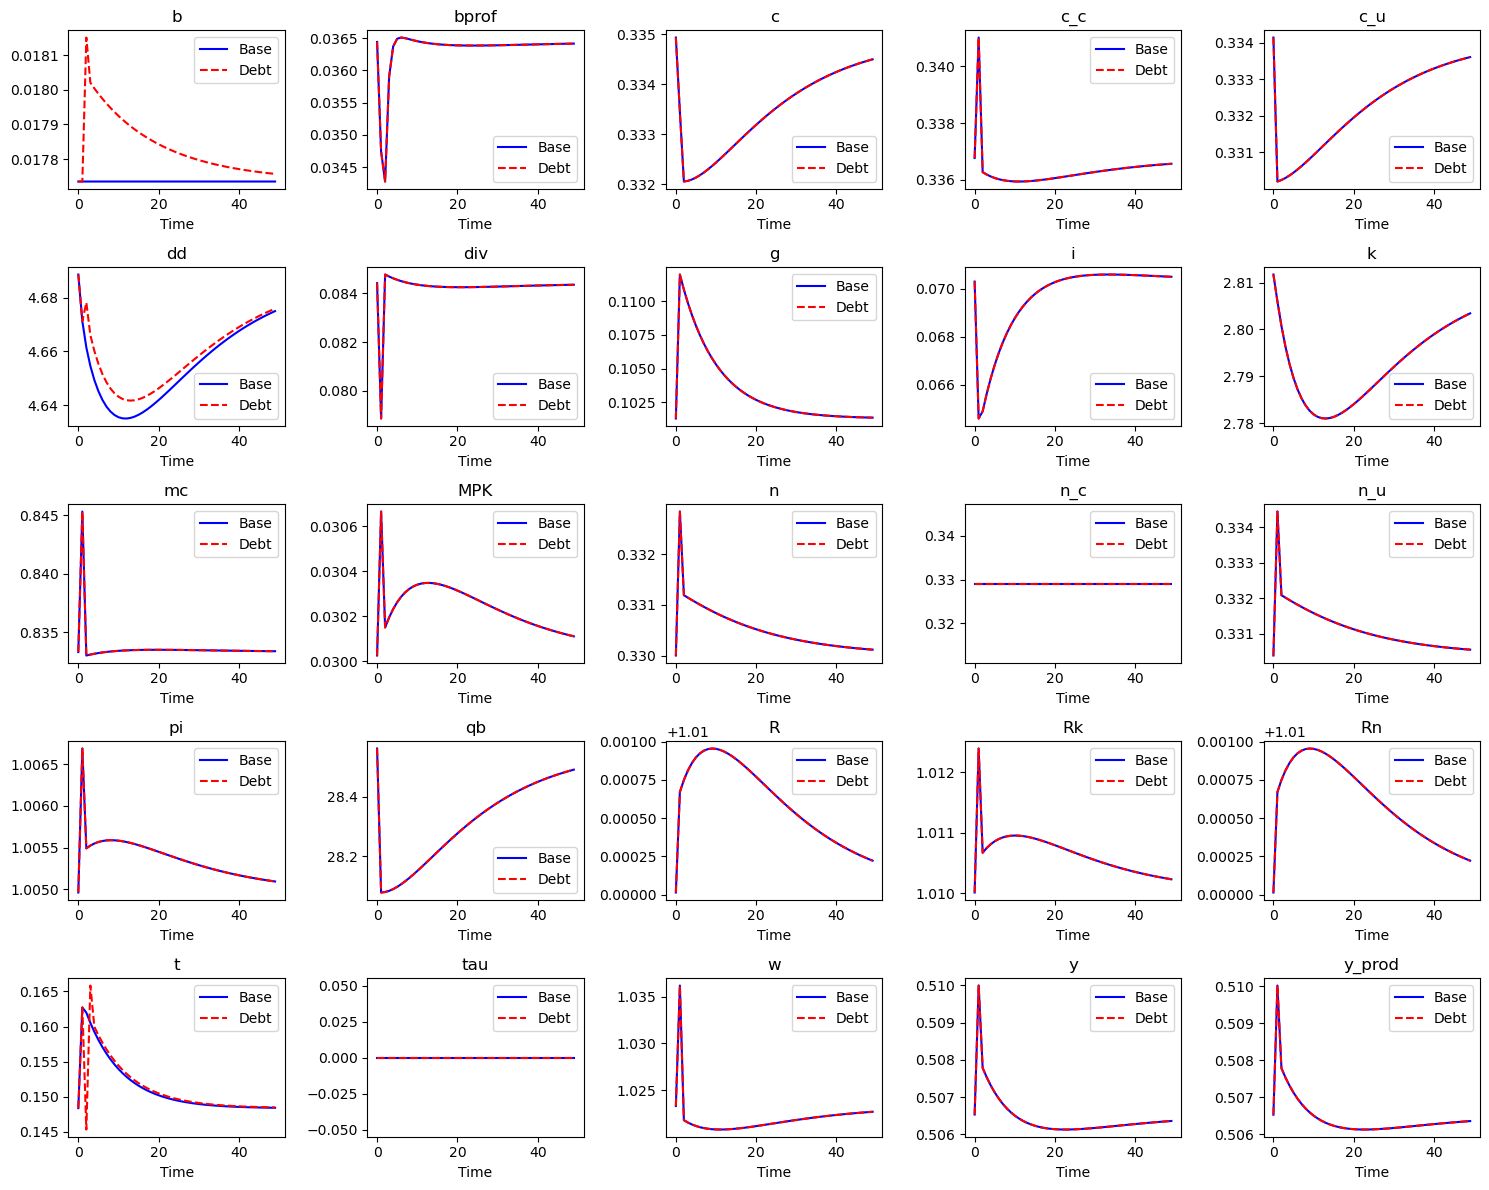

In [46]:

fig, axs = plt.subplots(5, 5, figsize=(15, 12))  

variables = base.var_names

for i, v in enumerate(variables):
    var_idx = base.var_names.index(v)  
    var_idx_debt = debt.var_names.index(v) 

    percentage_change_model1 = trj[:50, var_idx]
    percentage_change_model2 = trj_debt[:50, var_idx_debt]

    axs.flatten()[i].plot(percentage_change_model1, label='Base', color='blue')
    axs.flatten()[i].plot(percentage_change_model2, label='Debt', color='red', linestyle='dashed')
    axs.flatten()[i].set_xlabel('Time')
    axs.flatten()[i].set_title(v)
    axs.flatten()[i].legend()

fig.tight_layout()
plt.show()

### Comparison of models with labor tax


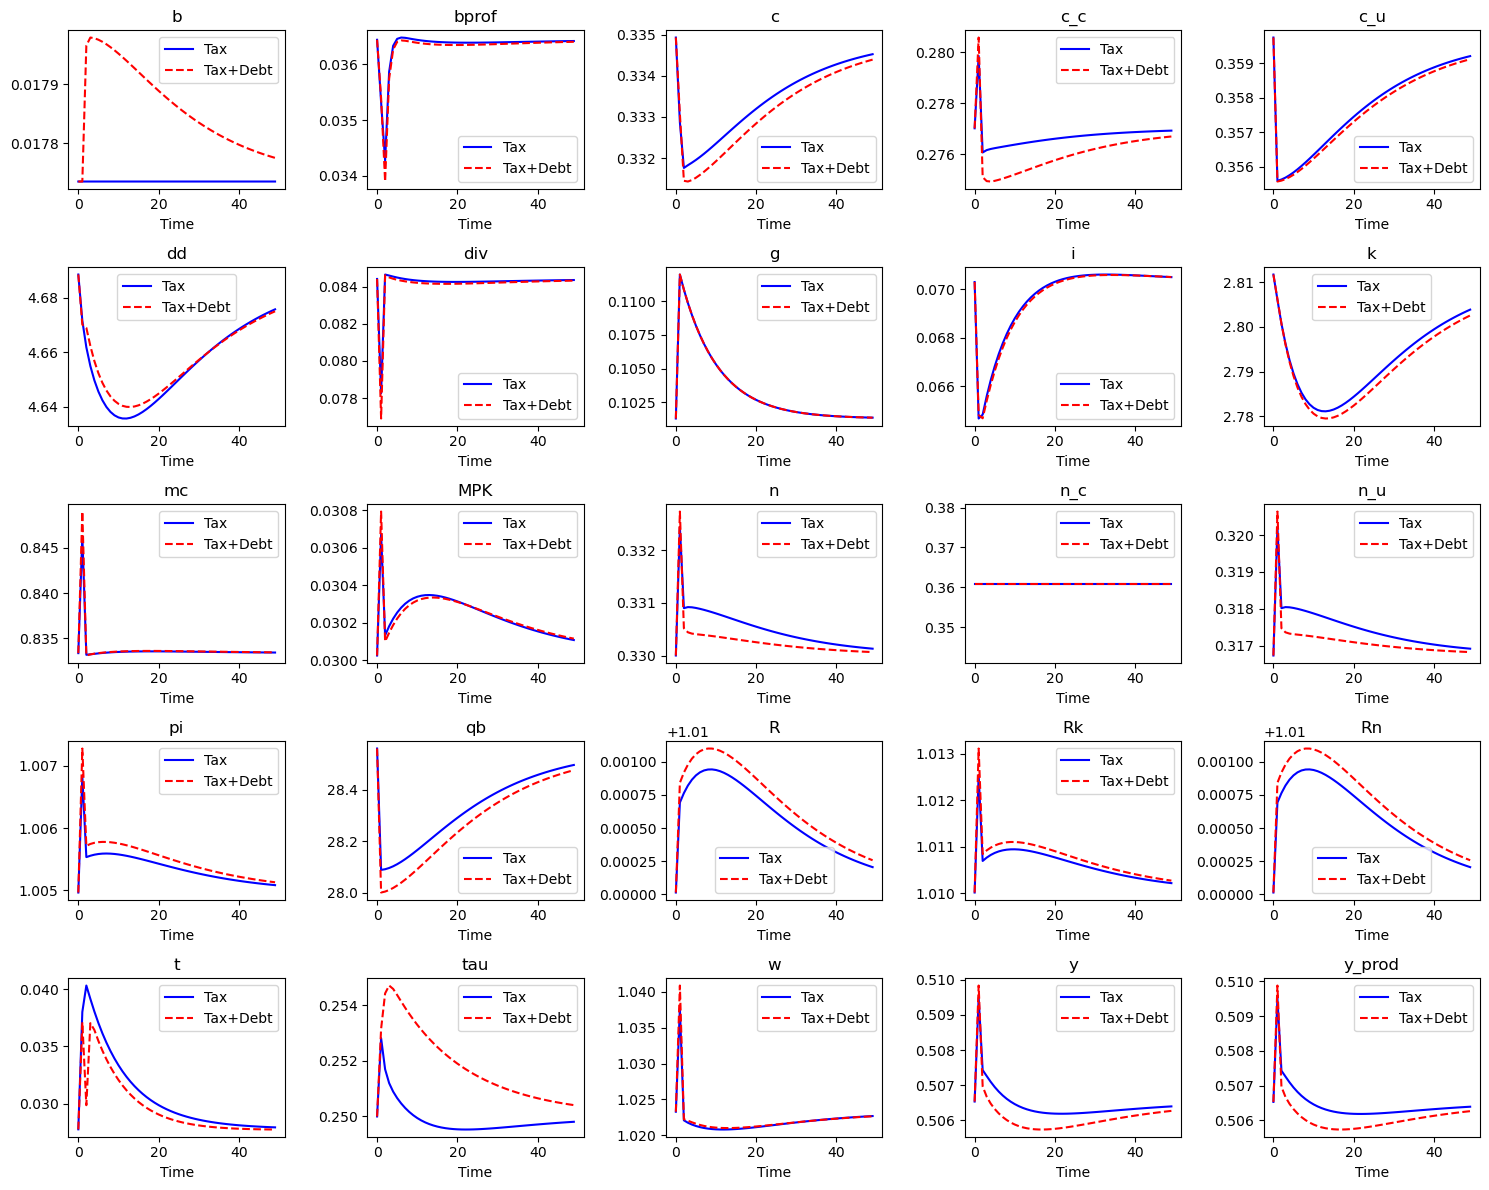

In [47]:

fig, axs = plt.subplots(5, 5, figsize=(15, 12)) 

variables = base.var_names

for i, v in enumerate(variables):
    var_idx_tax = tax.var_names.index(v)  
    var_idx_tax_debt = tax_debt.var_names.index(v) 

    percentage_change_model1 = trj_tax[:50, var_idx_tax]
    percentage_change_model2 = trj_tax_debt[:50, var_idx_tax_debt]

    axs.flatten()[i].plot(percentage_change_model1, label='Tax', color='blue')
    axs.flatten()[i].plot(percentage_change_model2, label='Tax+Debt', color='red', linestyle='dashed')
    axs.flatten()[i].set_xlabel('Time')
    axs.flatten()[i].set_title(v)
    axs.flatten()[i].legend()

fig.tight_layout()
plt.show()

### Comparison of models with steady bond issue


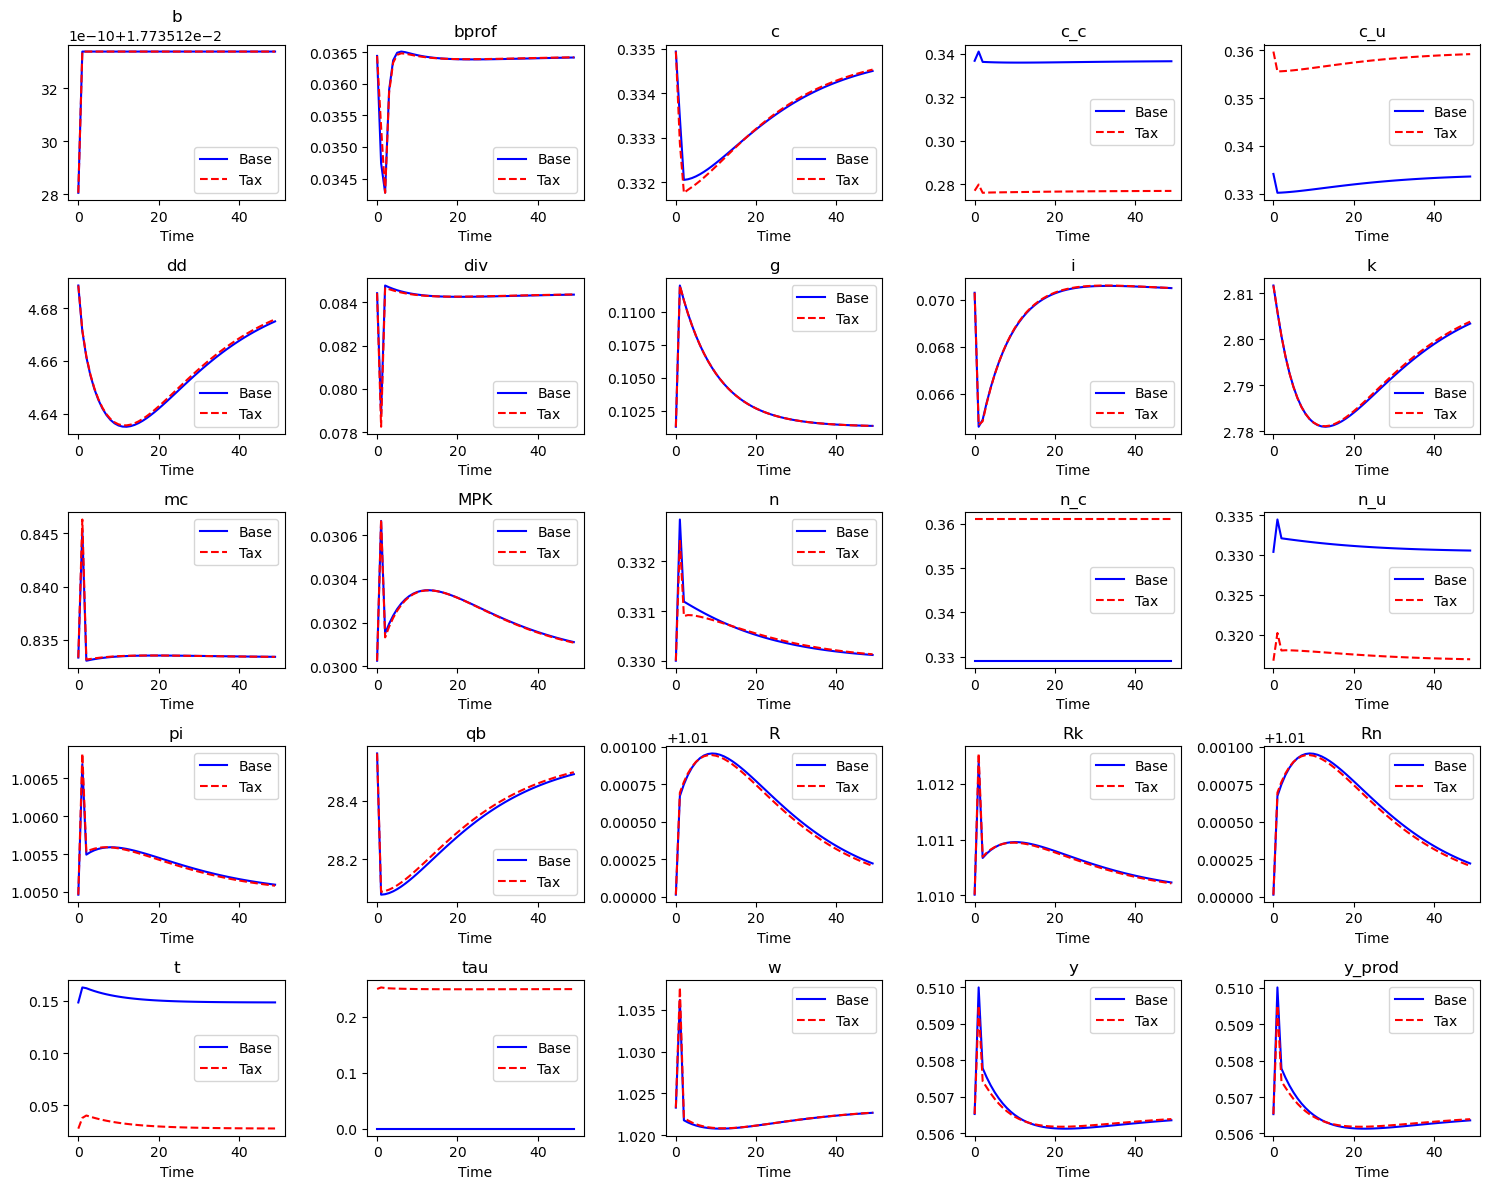

In [48]:

fig, axs = plt.subplots(5, 5, figsize=(15, 12))  

variables = base.var_names

for i, v in enumerate(variables):
    var_idx = base.var_names.index(v)  
    var_idx_tax = tax.var_names.index(v) 

    percentage_change_model1 = trj[:50, var_idx]
    percentage_change_model2 = trj_tax[:50, var_idx_tax]

    axs.flatten()[i].plot(percentage_change_model1, label='Base', color='blue')
    axs.flatten()[i].plot(percentage_change_model2, label='Tax', color='red', linestyle='dashed')
    axs.flatten()[i].set_xlabel('Time')
    axs.flatten()[i].set_title(v)
    axs.flatten()[i].legend()

fig.tight_layout()
plt.show()

### Comparison of models with varying bond issue


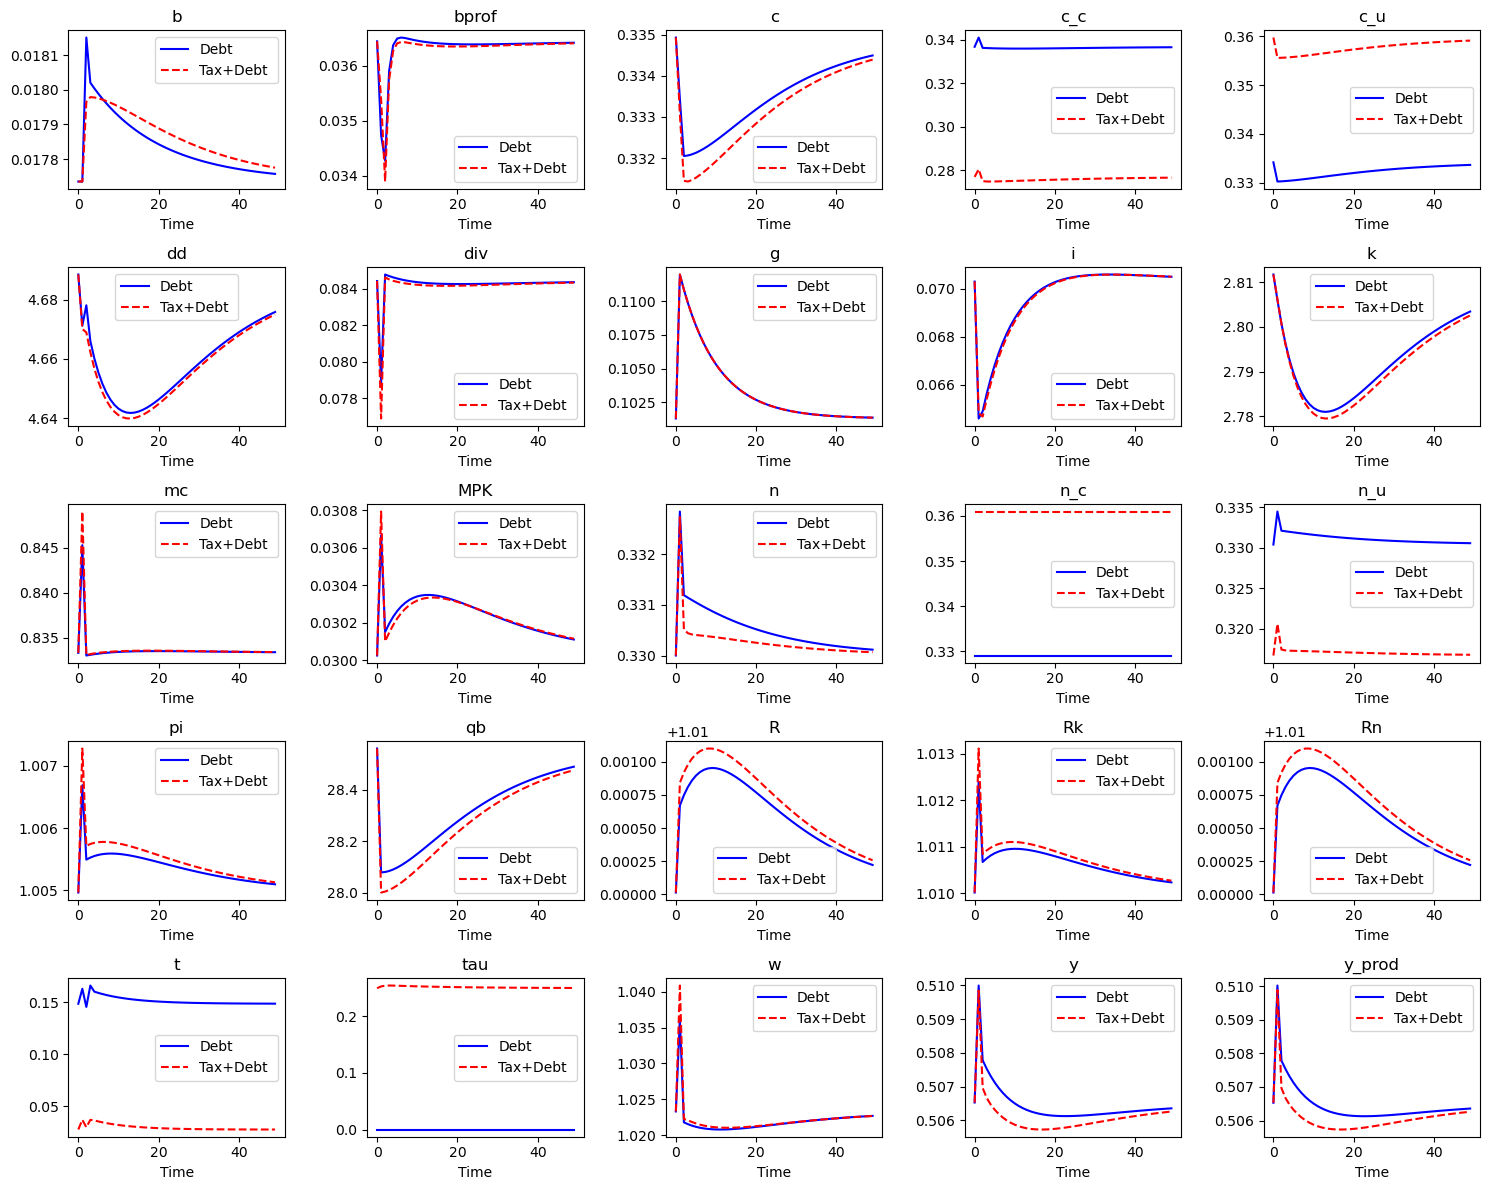

In [49]:

fig, axs = plt.subplots(5, 5, figsize=(15, 12))  

variables = base.var_names

for i, v in enumerate(variables):
    var_idx_debt = debt.var_names.index(v)  
    var_idx_tax_debt = tax_debt.var_names.index(v) 

    percentage_change_model1 = trj_debt[:50, var_idx_debt]
    percentage_change_model2 = trj_tax_debt[:50, var_idx_tax_debt]

    axs.flatten()[i].plot(percentage_change_model1, label='Debt', color='blue')
    axs.flatten()[i].plot(percentage_change_model2, label='Tax+Debt ', color='red', linestyle='dashed')
    axs.flatten()[i].set_xlabel('Time')
    axs.flatten()[i].set_title(v)
    axs.flatten()[i].legend()

fig.tight_layout()
plt.show()

### Comparison of models with one fiscal instrument


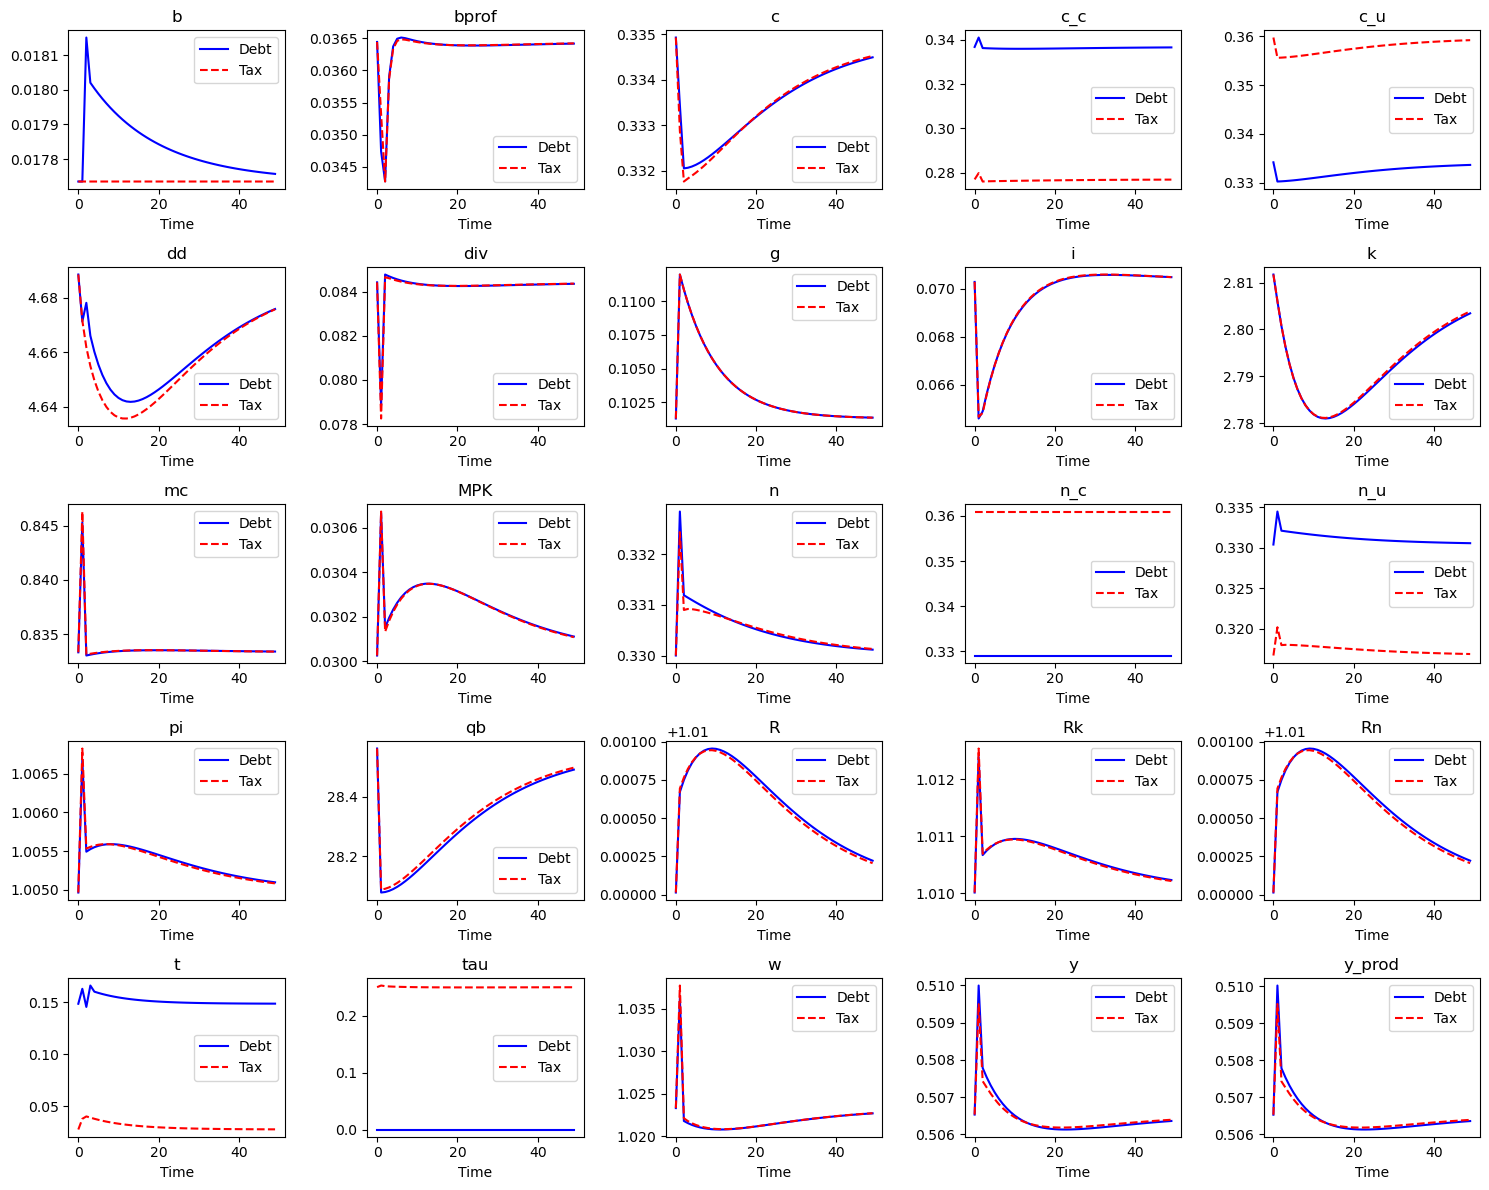

In [50]:

fig, axs = plt.subplots(5, 5, figsize=(15, 12))  

variables = base.var_names

for i, v in enumerate(variables):
    var_idx_debt = debt.var_names.index(v)  
    var_idx_tax = tax.var_names.index(v) 

    percentage_change_model1 = trj_debt[:50, var_idx_debt]
    percentage_change_model2 = trj_tax[:50, var_idx_tax]

    axs.flatten()[i].plot(percentage_change_model1, label='Debt', color='blue')
    axs.flatten()[i].plot(percentage_change_model2, label='Tax', color='red', linestyle='dashed')
    axs.flatten()[i].set_xlabel('Time')
    axs.flatten()[i].set_title(v)
    axs.flatten()[i].legend()

fig.tight_layout()
plt.show()

### Comparison of baseline model and "full" model


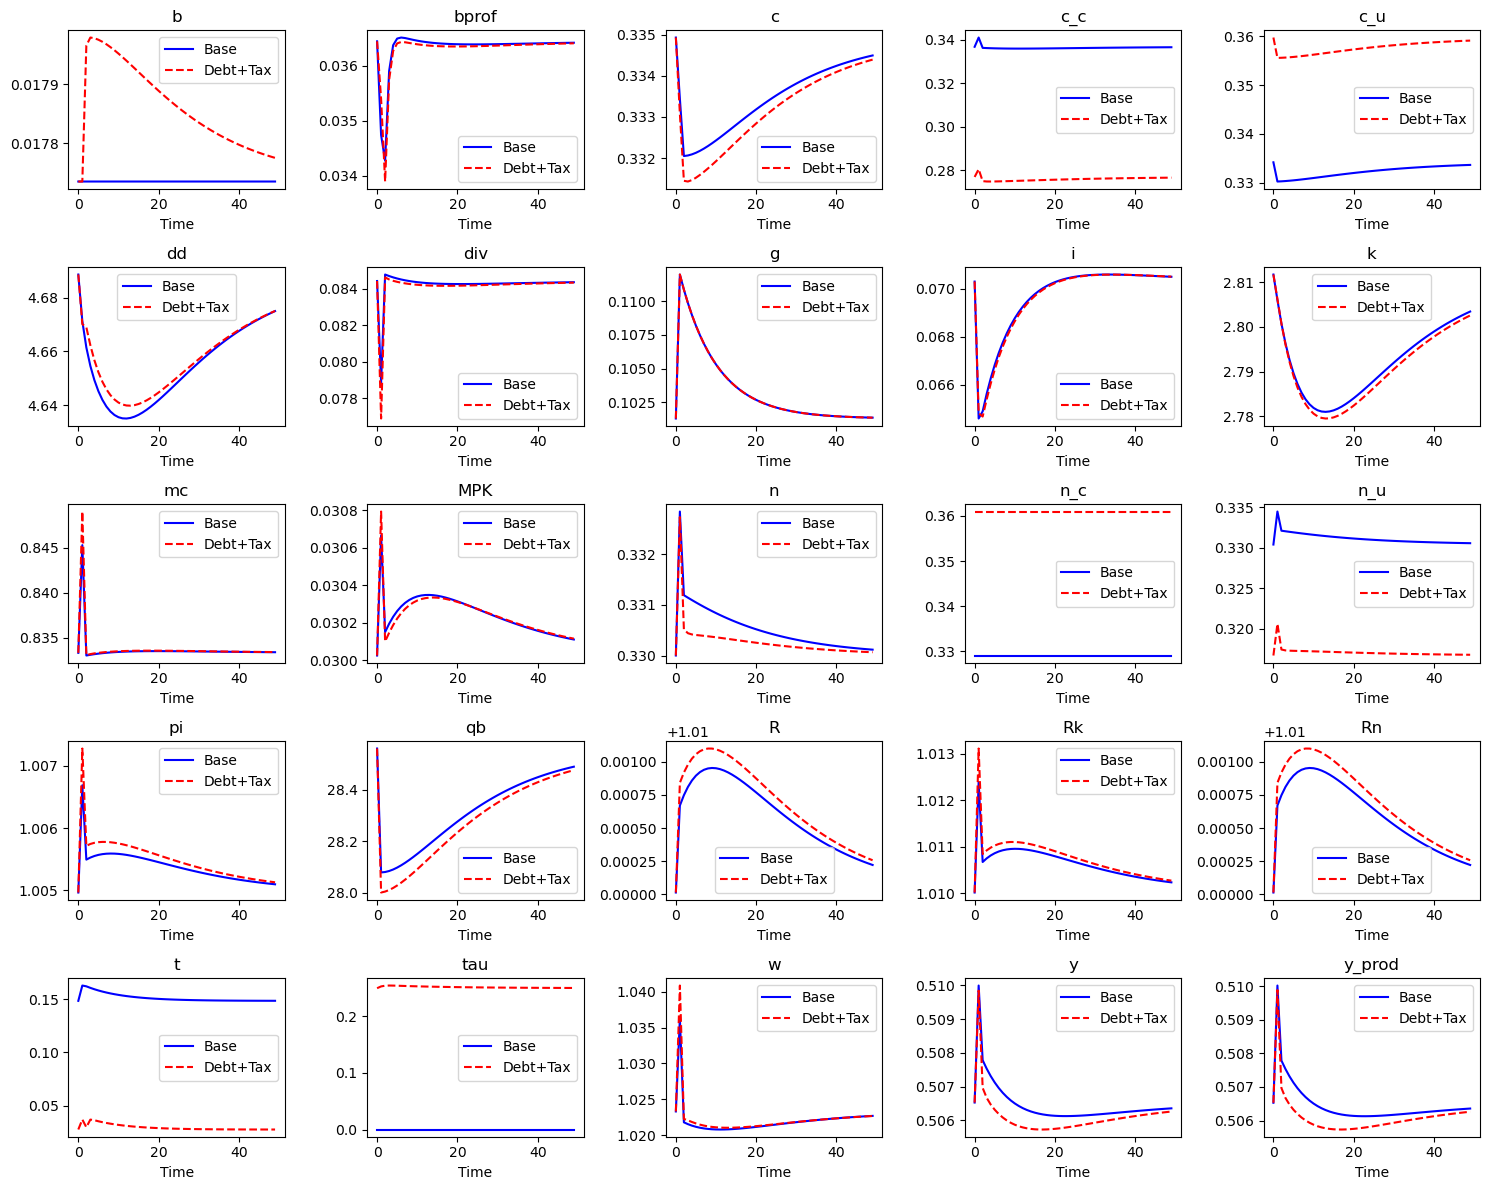

In [51]:

fig, axs = plt.subplots(5, 5, figsize=(15, 12))  

variables = base.var_names

for i, v in enumerate(variables):
    var_idx = base.var_names.index(v)  
    var_idx_tax_debt = tax_debt.var_names.index(v) 

    percentage_change_model1 = trj[:50, var_idx]
    percentage_change_model2 = trj_tax_debt[:50, var_idx_tax_debt]

    axs.flatten()[i].plot(percentage_change_model1, label='Base', color='blue')
    axs.flatten()[i].plot(percentage_change_model2, label='Debt+Tax', color='red', linestyle='dashed')
    axs.flatten()[i].set_xlabel('Time')
    axs.flatten()[i].set_title(v)
    axs.flatten()[i].legend()

fig.tight_layout()
plt.show()

## IRFs by sector

## Households

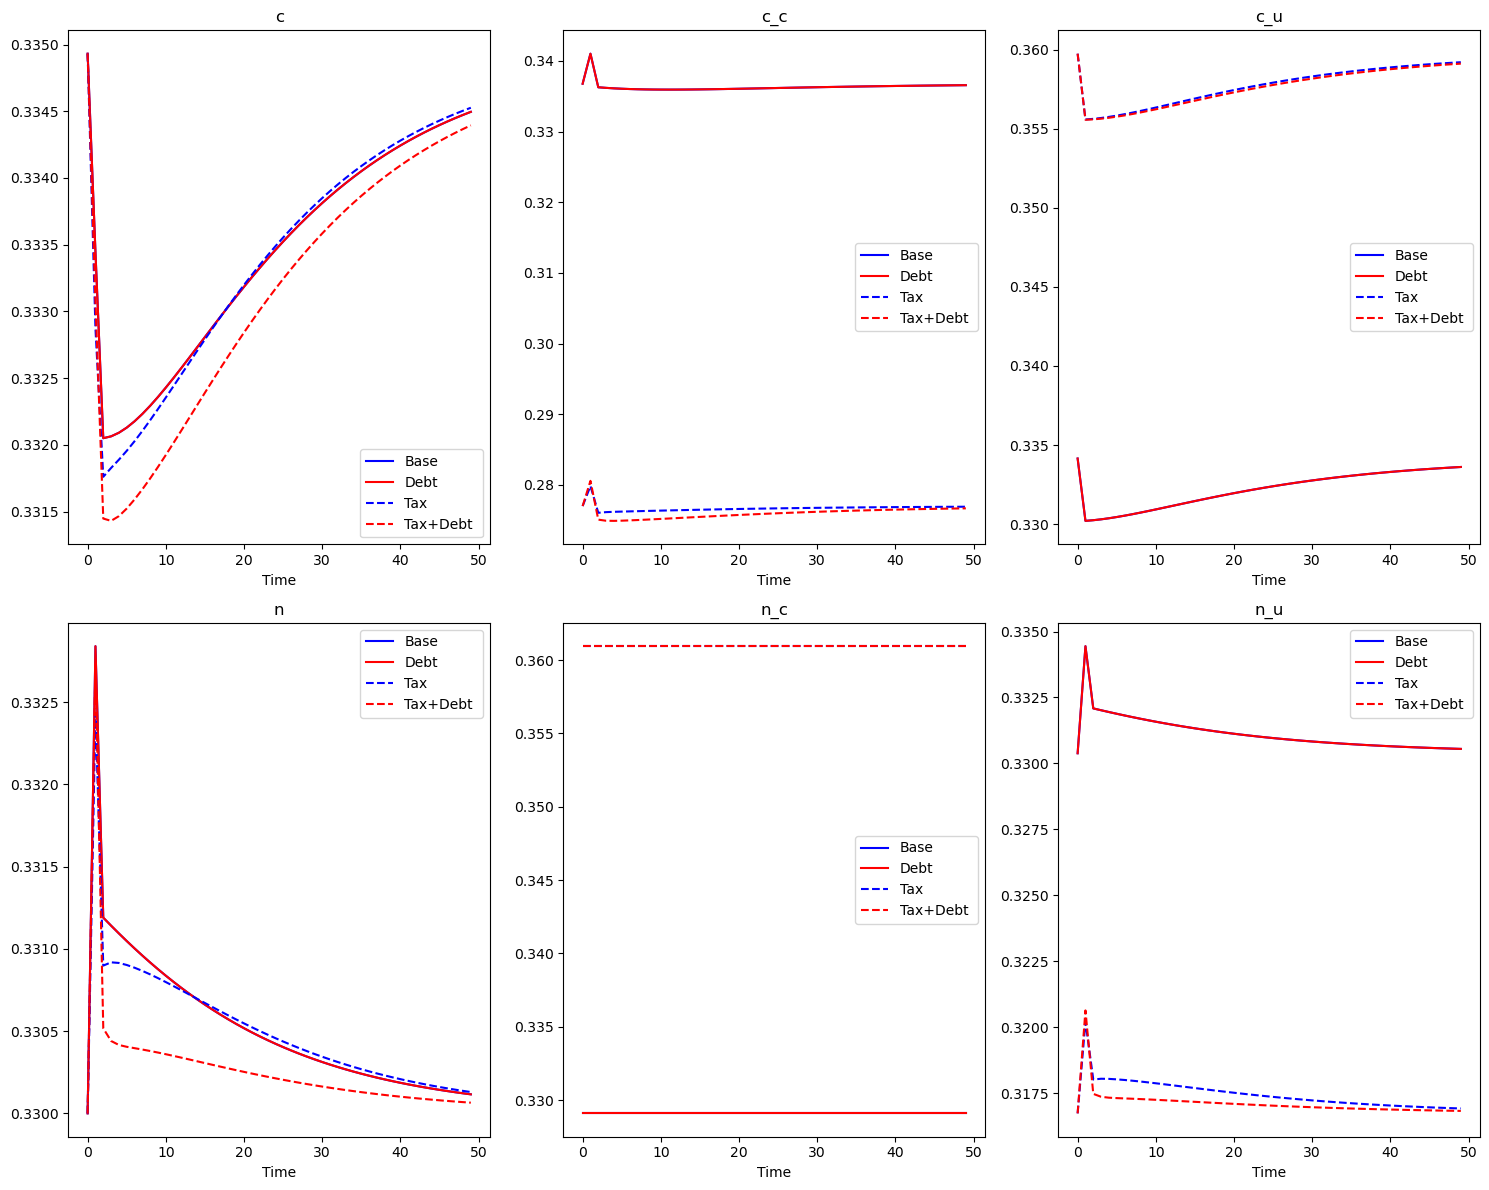

In [52]:

fig, axs = plt.subplots(2, 3, figsize=(15, 12))  

variables = ["c", "c_c", "c_u", "n", "n_c", "n_u"]

for i, v in enumerate(variables):
    var_idx = base.var_names.index(v)
    var_idx_debt = debt.var_names.index(v)  
    var_idx_tax = tax.var_names.index(v) 
    var_idx_tax_debt = tax_debt.var_names.index(v)  

    percentage_change_model1 = trj[:50, var_idx]
    percentage_change_model2 = trj_debt[:50, var_idx_debt]
    percentage_change_model3 = trj_tax[:50, var_idx_tax]
    percentage_change_model4 = trj_tax_debt[:50, var_idx_tax_debt]

    axs.flatten()[i].plot(percentage_change_model1, label='Base', color='blue')
    axs.flatten()[i].plot(percentage_change_model2, label='Debt', color='red')
    axs.flatten()[i].plot(percentage_change_model3, label='Tax', color='blue', linestyle='dashed')
    axs.flatten()[i].plot(percentage_change_model4, label='Tax+Debt ', color='red', linestyle='dashed')
    axs.flatten()[i].set_xlabel('Time')
    axs.flatten()[i].set_title(v)
    axs.flatten()[i].legend()

fig.tight_layout()
plt.show()

## "Banks" Block and Rates

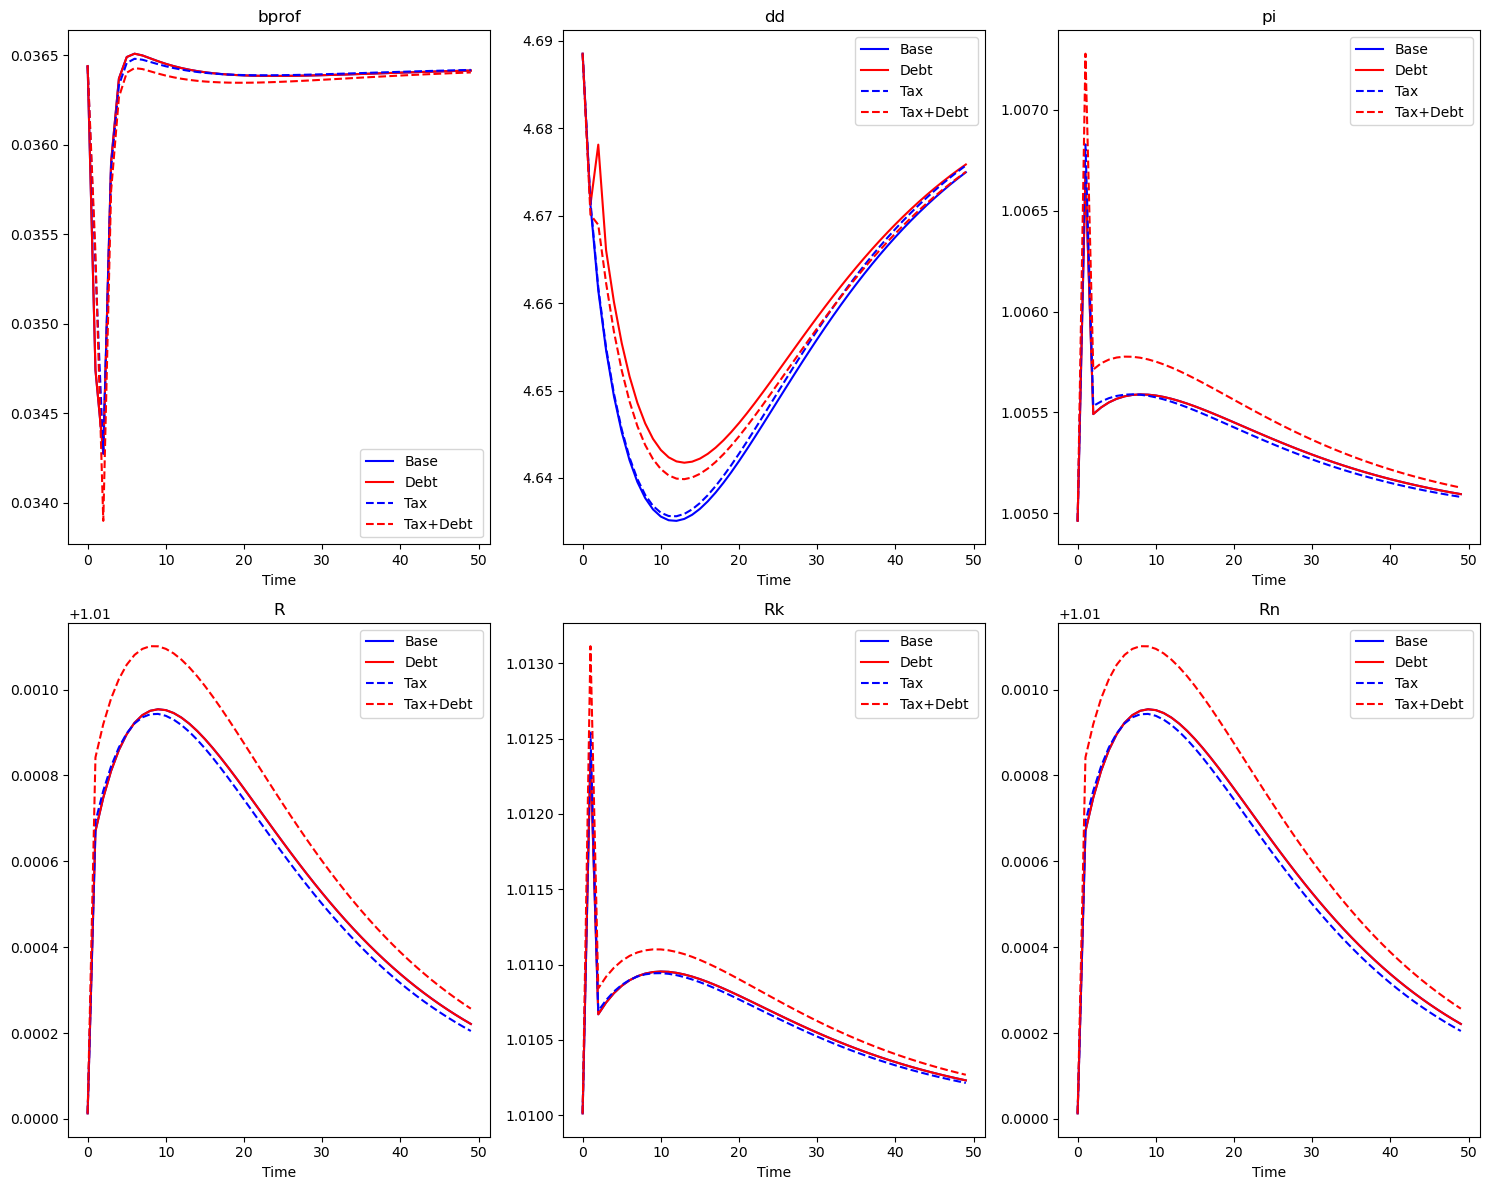

In [53]:

fig, axs = plt.subplots(2, 3, figsize=(15, 12))  

variables = ["bprof", "dd", "pi", "R", "Rk", "Rn"]

for i, v in enumerate(variables):
    var_idx = base.var_names.index(v)
    var_idx_debt = debt.var_names.index(v)  
    var_idx_tax = tax.var_names.index(v) 
    var_idx_tax_debt = tax_debt.var_names.index(v)  

    percentage_change_model1 = trj[:50, var_idx]
    percentage_change_model2 = trj_debt[:50, var_idx_debt]
    percentage_change_model3 = trj_tax[:50, var_idx_tax]
    percentage_change_model4 = trj_tax_debt[:50, var_idx_tax_debt]

    axs.flatten()[i].plot(percentage_change_model1, label='Base', color='blue')
    axs.flatten()[i].plot(percentage_change_model2, label='Debt', color='red')
    axs.flatten()[i].plot(percentage_change_model3, label='Tax', color='blue', linestyle='dashed')
    axs.flatten()[i].plot(percentage_change_model4, label='Tax+Debt ', color='red', linestyle='dashed')
    axs.flatten()[i].set_xlabel('Time')
    axs.flatten()[i].set_title(v)
    axs.flatten()[i].legend()

fig.tight_layout()
plt.show()

## "Firms" Block and production

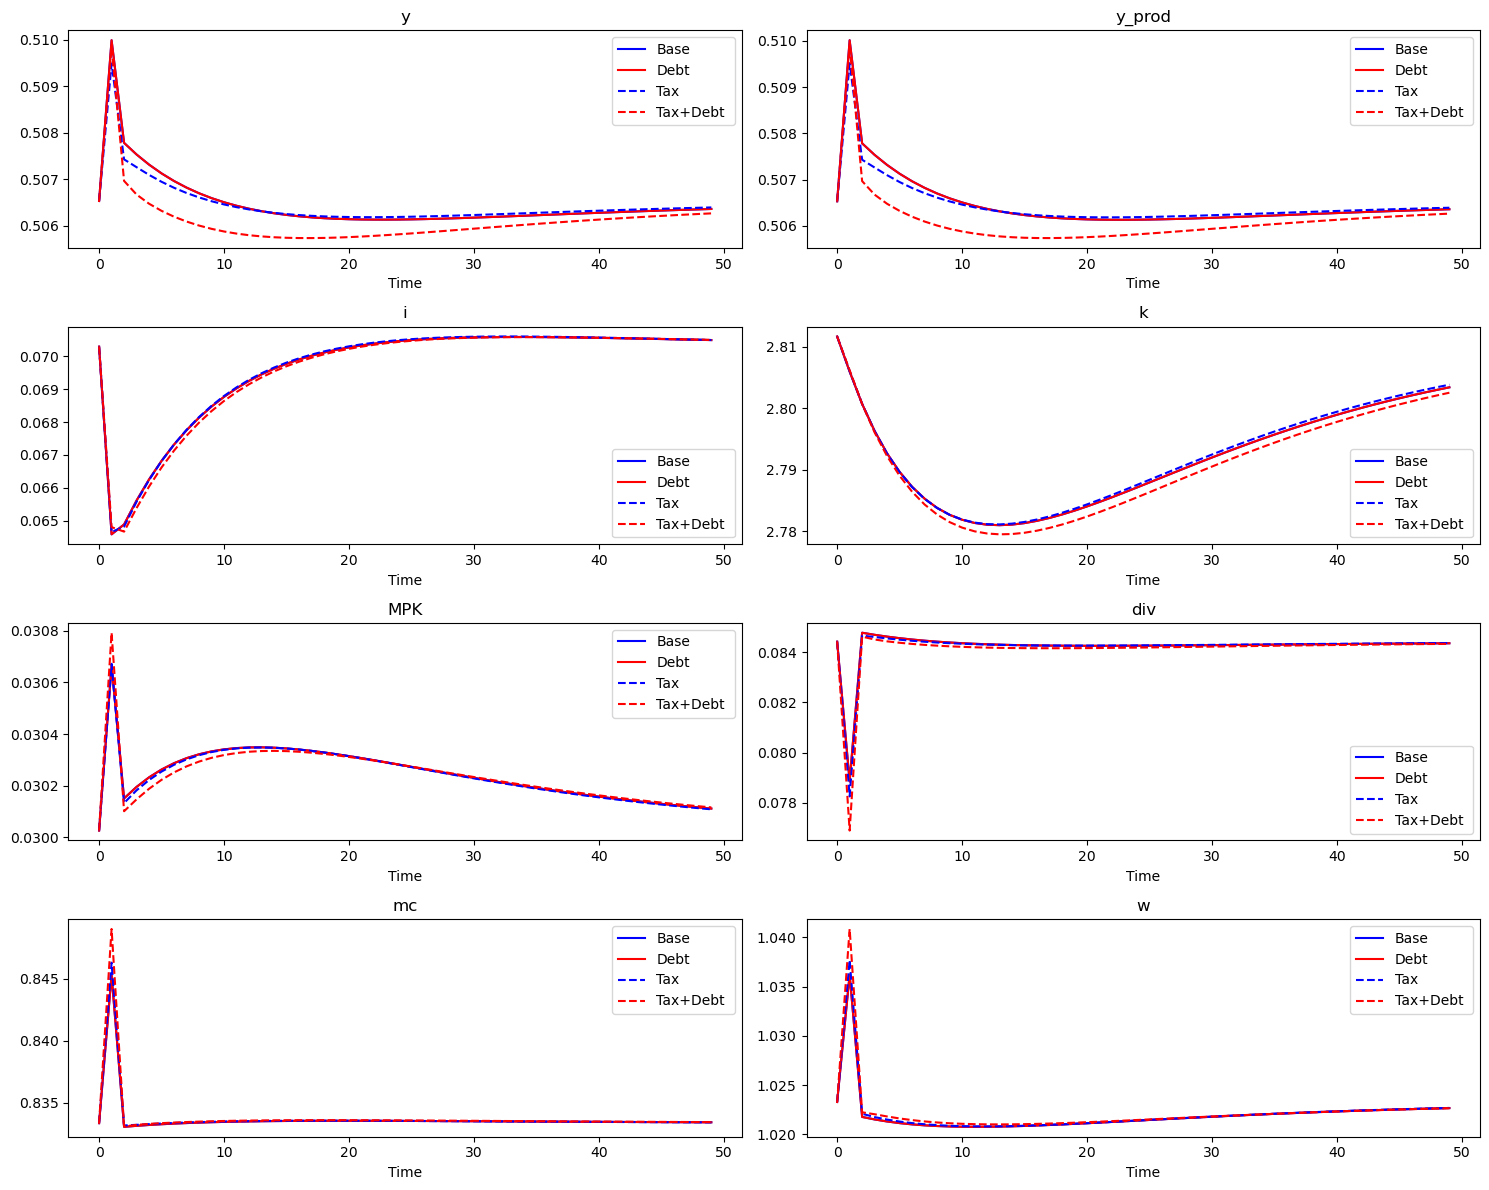

In [54]:

fig, axs = plt.subplots(4, 2, figsize=(15, 12))  

variables = ["y", "y_prod", "i", "k", "MPK", "div", "mc", "w"]

for i, v in enumerate(variables):
    var_idx = base.var_names.index(v)
    var_idx_debt = debt.var_names.index(v)  
    var_idx_tax = tax.var_names.index(v) 
    var_idx_tax_debt = tax_debt.var_names.index(v)  

    percentage_change_model1 = trj[:50, var_idx]
    percentage_change_model2 = trj_debt[:50, var_idx_debt]
    percentage_change_model3 = trj_tax[:50, var_idx_tax]
    percentage_change_model4 = trj_tax_debt[:50, var_idx_tax_debt]

    axs.flatten()[i].plot(percentage_change_model1, label='Base', color='blue')
    axs.flatten()[i].plot(percentage_change_model2, label='Debt', color='red')
    axs.flatten()[i].plot(percentage_change_model3, label='Tax', color='blue', linestyle='dashed')
    axs.flatten()[i].plot(percentage_change_model4, label='Tax+Debt ', color='red', linestyle='dashed')
    axs.flatten()[i].set_xlabel('Time')
    axs.flatten()[i].set_title(v)
    axs.flatten()[i].legend()

fig.tight_layout()
plt.show()

## "Policy" Block

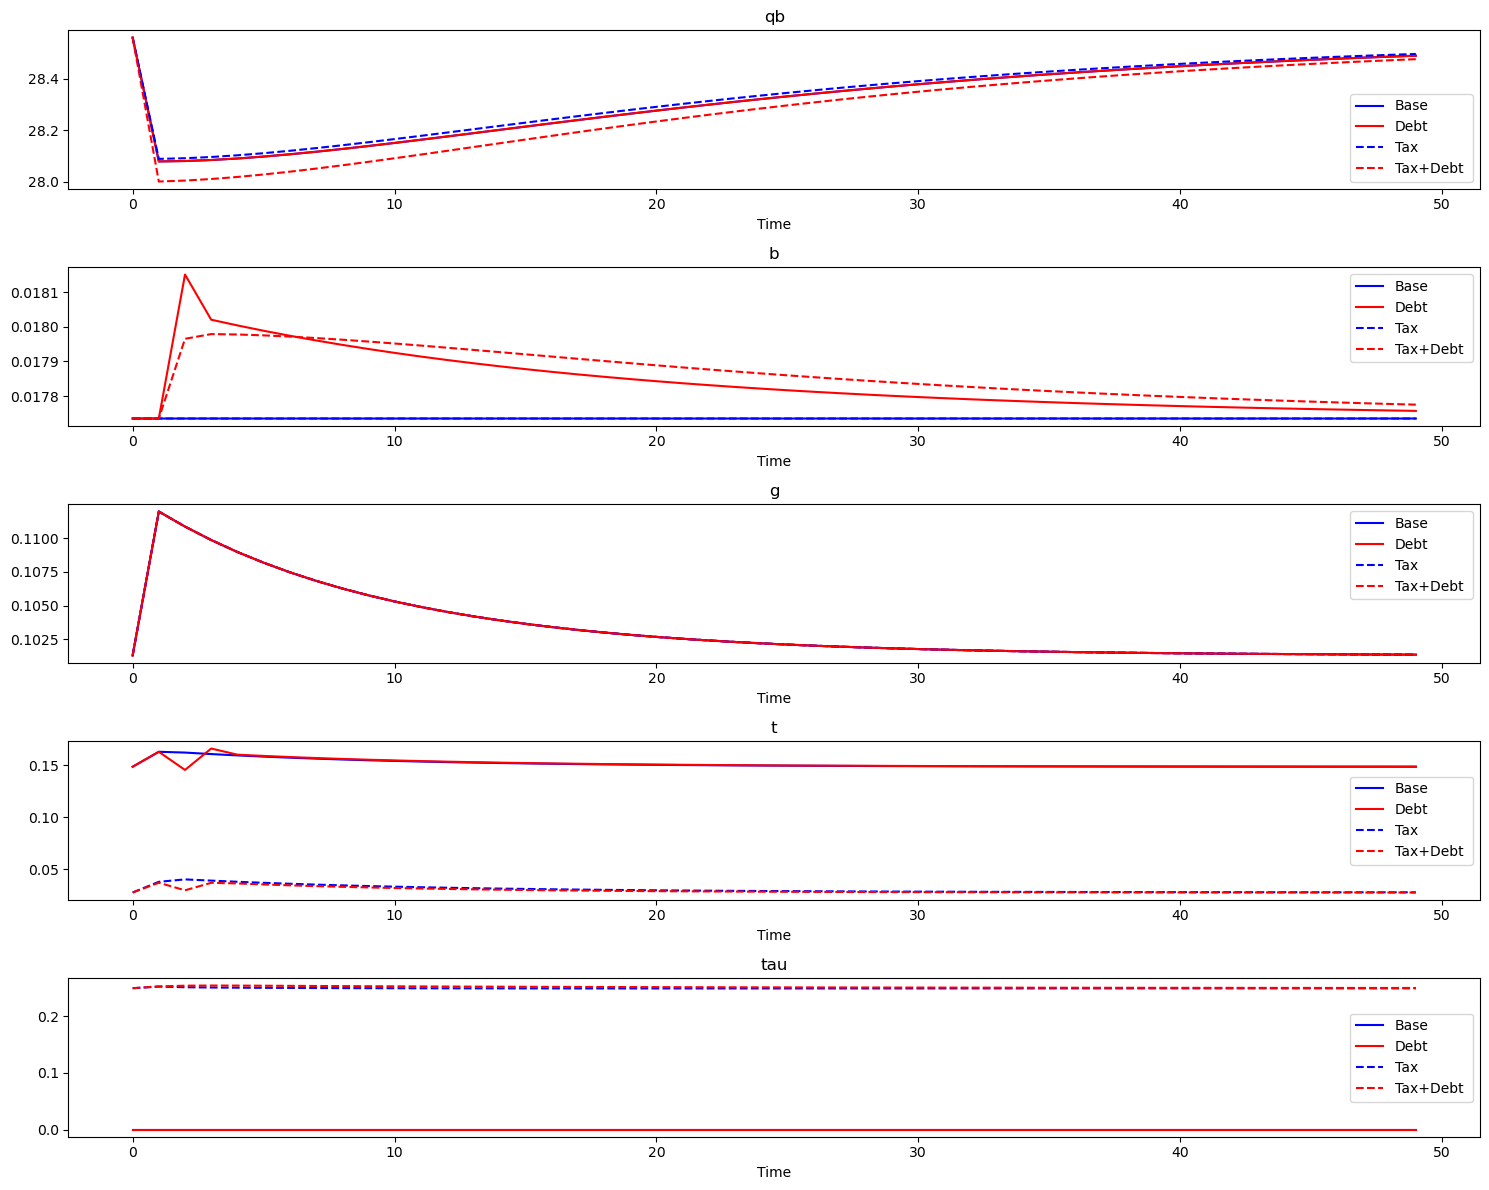

In [55]:

fig, axs = plt.subplots(5, 1, figsize=(15, 12))  

variables = ["qb", "b", "g", "t", "tau"]

for i, v in enumerate(variables):
    var_idx = base.var_names.index(v)
    var_idx_debt = debt.var_names.index(v)  
    var_idx_tax = tax.var_names.index(v) 
    var_idx_tax_debt = tax_debt.var_names.index(v)  

    percentage_change_model1 = trj[:50, var_idx]
    percentage_change_model2 = trj_debt[:50, var_idx_debt]
    percentage_change_model3 = trj_tax[:50, var_idx_tax]
    percentage_change_model4 = trj_tax_debt[:50, var_idx_tax_debt]

    axs.flatten()[i].plot(percentage_change_model1, label='Base', color='blue')
    axs.flatten()[i].plot(percentage_change_model2, label='Debt', color='red')
    axs.flatten()[i].plot(percentage_change_model3, label='Tax', color='blue', linestyle='dashed')
    axs.flatten()[i].plot(percentage_change_model4, label='Tax+Debt ', color='red', linestyle='dashed')
    axs.flatten()[i].set_xlabel('Time')
    axs.flatten()[i].set_title(v)
    axs.flatten()[i].legend()

fig.tight_layout()
plt.show()

In [61]:
variables = base.var_names
full_names = ["Bonds", "Bank Profits", "Consumption", "Consumption of Constrained Households", "Consumption of Unconstrained Households",
              "Deposits", "Dividends", "Government Expenditure", "Investments", "Capital", "Marginal Costs", "Marginal Product of Capital",
              "Labour", "Labour of Constrained Households", "Labour of Unconstrained Households", "Inflation", "Price of Bonds", "Nominal Interest Rate",
               "Actual Nominal Interest Rate", "Rental Rate of Capital", "Lump-Sum Taxes", "Labour Tax rate", "Wage", "Output", "Production"]
alias = dict(zip(variables, full_names))

this_dir = Path()
output_dir = this_dir / "bld" / "plots"
output_dir.mkdir(parents=True, exist_ok=True)  # Ensure output directory exists

for v in variables:
    # Find the index of the variable in the relevant models
    var_idx = base.var_names.index(v)
    var_idx_debt = debt.var_names.index(v)  
    var_idx_tax = tax.var_names.index(v) 
    var_idx_tax_debt = tax_debt.var_names.index(v)  

    # Extract the percentage change for each model
    percentage_change_model1 = trj[:50, var_idx]
    percentage_change_model2 = trj_debt[:50, var_idx_debt]
    percentage_change_model3 = trj_tax[:50, var_idx_tax]
    percentage_change_model4 = trj_tax_debt[:50, var_idx_tax_debt]

    # Create a new figure for each variable
    plt.figure(figsize=(10, 6))
    
    # Plot each model
    plt.plot(percentage_change_model1, label='Base', color='blue')
    plt.plot(percentage_change_model2, label='Debt', color='red')
    plt.plot(percentage_change_model3, label='Tax', color='blue', linestyle='dashed')
    plt.plot(percentage_change_model4, label='Tax+Debt', color='red', linestyle='dashed')

    # Set labels and title
    plt.xlabel('Time')
    plt.title(alias[v])
    plt.legend()

    # Save the figure with the variable name as the filename
    plt.savefig(f'{output_dir}/{v}_plot.png')  # Save in the root directory
    plt.close()  # Close the figure to free memory
